In [17]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import svm
from skrvm import RVR,RVC

In [18]:
train_file = "/home/yzz/Sample_data/fashion-mnist_train.csv"
test_file  = "/home/yzz/Sample_data/fashion-mnist_test.csv"

train_data = pd.read_csv(train_file)
test_data = pd.read_csv(test_file)

total_train = len(train_data)
total_test = len(test_data)

print("Number of train data: %s"%total_train)
print("Number of test data: %s"%total_test)

train_data.head()

Number of train data: 60000
Number of test data: 10000


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
# prepare the data
X_train = train_data.loc[:, train_data.columns != 'label']/255.0
y_train = train_data.loc[:,train_data.columns == 'label']

X_test = test_data.loc[:, train_data.columns != 'label']/255.0
y_test = test_data.loc[:,train_data.columns == 'label']

label_train=pd.DataFrame([train_data.iloc[:,0]]).T

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape )

(60000, 784) (60000, 1) (10000, 784) (10000, 1)


In [20]:
labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}
label_train['category']=label_train['label'].map(labels)


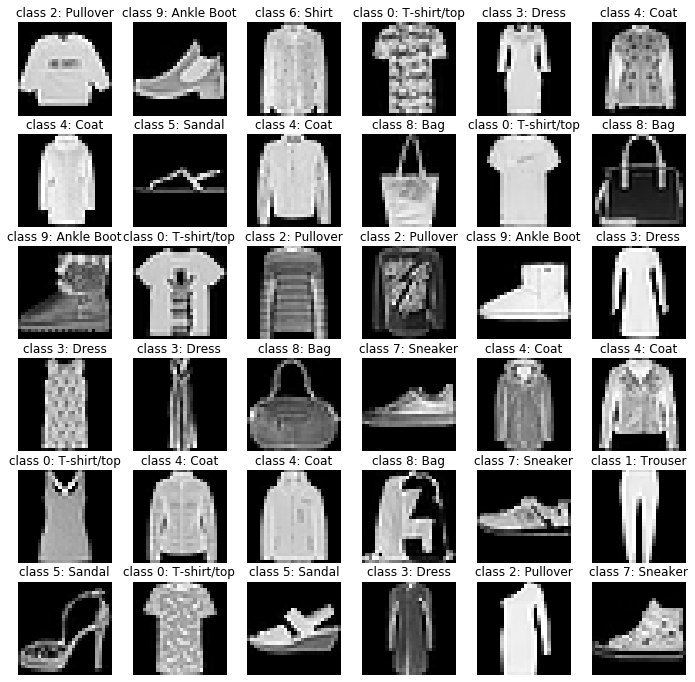

In [21]:
L = 6
W = 6
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in range(36):
    axes[i].imshow(X_train.values.reshape((X_train.shape[0], 28, 28))[i], cmap=plt.get_cmap('gray'))
    axes[i].set_title("class " + str(label_train['label'][i]) + ": "+ label_train['category'][i])
    axes[i].axis('off')
plt.show()

In [22]:
l_train=pd.DataFrame([train_data.iloc[:,0]]).T
X_train, X_val, Y_train, Y_val = train_test_split(X_train, l_train, test_size = 0.25, random_state=255)

In [23]:
np.mean(X_train.values),np.std(X_train.values),np.mean(X_val.values),np.std(X_val.values)

(0.28573853674803273,
 0.3525878811647684,
 0.2872052621048414,
 0.35347813709187687)

In [24]:
X_train=StandardScaler().fit_transform(X_train)
X_val=StandardScaler().fit_transform(X_val)

np.mean(X_train),np.std(X_train),np.mean(X_val),np.std(X_val)

(-6.280388152090443e-18, 1.0, -2.8772147174231266e-18, 0.9999999999999989)

In [25]:
column_name=['pixel'+str(i) for i in range(1,785)]
X_train = pd.DataFrame(X_train,columns =column_name)
X_val = pd.DataFrame(X_val,columns =column_name)

In [26]:
# Dimension Reduction
pca = PCA(n_components=0.9,copy=True, whiten=False)
X_train = pca.fit_transform(X_train)
X_val = pca.transform(X_val)
print(pca.explained_variance_ratio_)

[0.22021041 0.14384998 0.0547689  0.05131468 0.04063138 0.03007163
 0.02747667 0.02328081 0.016965   0.01312661 0.01167599 0.00966141
 0.00899778 0.00863649 0.00742566 0.0073279  0.0065662  0.00632188
 0.00623672 0.00579956 0.00518253 0.0051314  0.00473594 0.00455951
 0.00437728 0.00416881 0.00393644 0.00392189 0.00382522 0.0037333
 0.00371573 0.00351303 0.00336553 0.00328974 0.00328232 0.00319012
 0.0030556  0.00294426 0.0028811  0.00282458 0.0027157  0.00266539
 0.00258201 0.00254747 0.00247826 0.00245517 0.0023832  0.00227583
 0.00224023 0.0021398  0.00210534 0.00209826 0.00202363 0.00201152
 0.00197738 0.00195216 0.00191349 0.00184274 0.00183835 0.00179505
 0.00176205 0.00174474 0.00172148 0.00168596 0.00162911 0.00157656
 0.00155699 0.00151357 0.00148351 0.00147275 0.00144672 0.00144151
 0.00142568 0.00141295 0.00137972 0.00136985 0.00134535 0.00130561
 0.00129231 0.00126802 0.0012613  0.00123772 0.00121467 0.00119871
 0.00117982 0.00115049 0.00114735 0.00112809 0.00111563 0.00110

In [27]:
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
fig = go.Figure(data=go.Scatter(x=list(range(1,len(var)+1)), y=var))
fig.update_layout(title='PCA Variance Explained',
                   xaxis_title='# Of Features',
                   yaxis_title='% Variance Explained')
fig.show()

In [28]:
pcn=X_train.shape[1]

In [29]:
X_train = pd.DataFrame(X_train,columns =column_name[0:pcn])
X_val = pd.DataFrame(X_val,columns =column_name[0:pcn])

In [30]:
# Logistic Bayesian
start_time = time.time()
lg = LogisticRegression(solver='liblinear')  
lg.fit(X_train, Y_train.values.ravel())
y_train_prd = lg.predict(X_train)
y_val_prd = lg.predict(X_val)
acc_train_lg=accuracy_score(Y_train,y_train_prd )
acc_val_lg=accuracy_score(Y_val,y_val_prd)
print("accuracy on train set:{:.4f}\naccuracy on validation set:{:.4f}".format(acc_train_lg,
acc_val_lg))
print("--- %s seconds ---" % (time.time() - start_time))

accuracy on train set:0.8526
accuracy on validation set:0.8411
--- 70.48347759246826 seconds ---


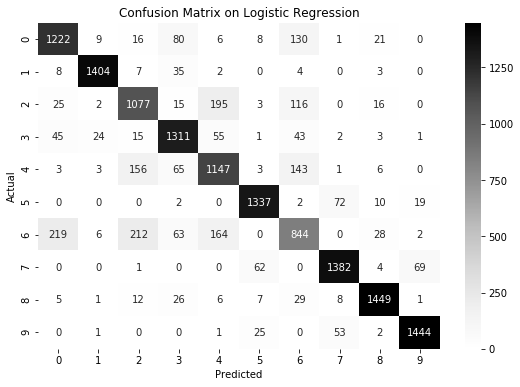

In [31]:
con_matrix = pd.crosstab(pd.Series(Y_val.values.flatten(), name='Actual' ),pd.Series(y_val_prd, name='Predicted'))
plt.figure(figsize = (9,6))
plt.title("Confusion Matrix on Logistic Regression")
sns.heatmap(con_matrix, cmap="Greys", annot=True, fmt='g')
plt.show()

In [32]:
# SVM
start_time = time.time()
svc = svm.SVC(kernel = 'rbf',decision_function_shape='ovo')
svc.fit(X_train, Y_train.values.ravel())
y_train_prd = svc.predict(X_train)
y_val_prd = svc.predict(X_val)
acc_train_svc=accuracy_score(Y_train,y_train_prd )
acc_val_svc=accuracy_score(Y_val,y_val_prd)
print("accuracy on train set:{:.4f}\naccuracy on validation set:{:.4f}".format(acc_train_svc,
acc_val_svc))
print("--- %s seconds ---" % (time.time() - start_time))

accuracy on train set:0.9624
accuracy on validation set:0.8692
--- 429.9834306240082 seconds ---


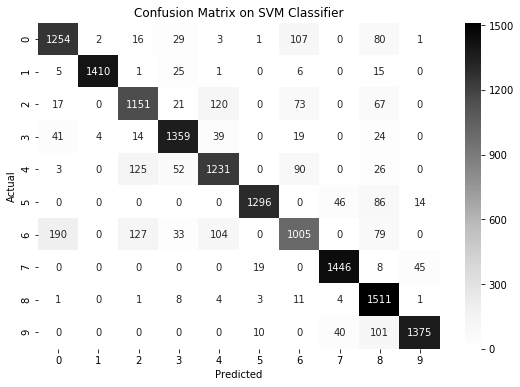

In [33]:
con_matrix = pd.crosstab(pd.Series(Y_val.values.flatten(), name='Actual' ),pd.Series(y_val_prd, name='Predicted'))
plt.figure(figsize = (9,6))
plt.title("Confusion Matrix on SVM Classifier")
sns.heatmap(con_matrix, cmap="Greys", annot=True, fmt='g')
plt.show()